<a href="https://colab.research.google.com/github/EddyGiusepe/Remember_Statistics_for_Data_Science_with_Python/blob/main/Remember_statistics_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Statistics for Data Science with Python</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


* Este Script está baseado [neste vídeo](https://www.youtube.com/watch?v=2xbNl3JxrDc).




## Importamos as nossas bibliotecas

In [1]:
import numpy as np
import pandas as pd

import scipy.stats
from scipy.stats import ttest_ind, levene, f_oneway, chi2_contingency, pearsonr

import seaborn as sns
import matplotlib.pyplot as plt


## Carregamos nossos Dados

In [2]:
df = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Remember_Statistics_for_Data_Science/teachingratings.csv")
df.head(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [3]:
df.shape

(463, 19)

In [4]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color="orange">T-Test</font>

**Hipótese nula (Null Hypothesis)**: a pontuação da avaliação é independente dos instrutores do sexo feminino e masculino

**Hipótese alternativa (Alternate Hypothesis)**: a pontuação da avaliação depende dos instrutores do sexo feminino e masculino

In [5]:
ttest_ind(df[df["gender"] == "male"]["eval"], df[df["gender"] == "female"]["eval"])

Ttest_indResult(statistic=3.249937943510772, pvalue=0.0012387609449522217)

**Probabilidade de obter uma avaliação de ensino alta ou baixa**

In [6]:
eval_mean = round(df["eval"].mean(), 3)
eval_std = round(df["eval"].std(), 3)

print(eval_mean, eval_std)

3.998 0.555


In [7]:
prob = scipy.stats.norm.cdf((4.5 - eval_mean) / eval_std)
print(1- prob)

0.1828639734596742


## <font color="orange">Levene-Test</font>

**Hipótese nula (Null Hypothesis)**: Variâncias populacionais são iguais

**Hipótese alternativa (Alternate Hypothesis)**: Variâncias populacionais não são iguais

In [8]:
levene(df[df["gender"] == "male"]["eval"], df[df["gender"] == "female"]["eval"], center = "mean")

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

## <font color="orange">ANOVA</font>

A Análise de Variância (**ANOVA**) é uma fórmula estatística usada para comparar as variâncias entre as medianas (ou médias) de grupos diferentes. Diversos cenários usam ANOVA para determinar se há alguma diferença entre as medianas dos diferentes grupos.


**Hipótese nula (Null Hypothesis)**: As amostras têm os mesmos valores médios (mean)

**Hipótese alternativa (Alternate Hypothesis)**: As amostras têm diferentes valores médios (mean)

In [9]:
def group(x):
    if x <= 40:
        return "younger"
    elif x > 40 and x < 57:
        return "middle"
    else:
        return "older"

df["age_group"] = df["age"].apply(group)

**Estatísticas de beleza por faixa etária (por Idade)**

In [10]:
age_stats = df.groupby("age_group")["beauty"].agg(["count", "mean", "std"])
age_stats

,count,mean,std
age_group,,,
middle,228,-0.035111,0.686637
older,122,-0.245777,0.740720
younger,113,0.336196,0.913748


**Prepare os Dados**

In [11]:
younger = df[df["age_group"] == "younger"]["beauty"]
middle = df[df["age_group"] == "middle"]["beauty"]
older = df[df["age_group"] == "older"]["beauty"]

**f-oneway (ANOVA)**

In [12]:
f_stats, pvalue = f_oneway(younger, middle, older)

print(f"f-statistics =",f_stats, f"p-value =", pvalue)

f-statistics = 17.597558611010122 p-value = 4.3225489816137975e-08


**Resultado dos testes**

In [13]:
if pvalue > 0.5:
    print("Hipótese nula aceita")
else:
    print("Hipótese alternativa aceita")

Hipótese alternativa aceita


## <font color="orange">ANOVA</font>

**Hipótese nula (Null Hypothesis)**: A pontuação da avaliação não é afetada pela idade do instrutor

**Hipótese alternativa (Alternate Hypothesis)**: A pontuação da avaliação é afetada pela idade do instrutor

In [14]:
younger_eval = df[df["age_group"] == "younger"]["eval"]
middle_eval = df[df["age_group"] == "middle"]["eval"]
older_eval = df[df["age_group"] == "older"]["eval"]

**f-oneway ANOVA**

In [15]:
f_statistics, pvalue = f_oneway(younger_eval, middle_eval, older_eval)
print(f"f-statistics = {f_statistics}", f"pvalue = {pvalue}")

f-statistics = 1.2226327996572204 pvalue = 0.29540894225417536


In [16]:
if pvalue > 0.05:
    print("Aceitar hipótese nula")

else:
    print("Aceitar Hipótese Alternativa")

Aceitar hipótese nula


## <font color="orange">Chi-Squared Test</font>

**Hipótese nula (Null Hypothesis)**: Há associação entre gênero (_gender_) e estabilidade (_tenured_)

**Hipótese alternativa (Alternate Hypothesis)**: Não há associação entre gênero (_gender_) e estabilidade (_tenured_)

In [17]:
mt = df[df["gender"] == "male"]["tenure"]
yt = df[df["gender"] == "female"]["tenure"]

**Valores**

In [18]:
mft = pd.crosstab(df["tenure"],  df["gender"])


In [19]:
mft

gender,female,male
tenure,,
no,50,52
yes,145,216


In [20]:
chisquare, pvalue, freedom, array = chi2_contingency(mft, correction = False)

In [21]:
print(f"Chi-Square Statistics = {chisquare}\n P-Value = {pvalue}\n Degree of Freedom = {freedom}\n Expected Values = {array}")

Chi-Square Statistics = 2.557051129789522
 P-Value = 0.10980322511302845
 Degree of Freedom = 1
 Expected Values = [[ 42.95896328  59.04103672]
 [152.04103672 208.95896328]]


In [22]:
if pvalue >= 0.05:
    print("Aceitar hipótese nula")
else:
    print("Aceitar Hipótese Alternativa")

Aceitar hipótese nula


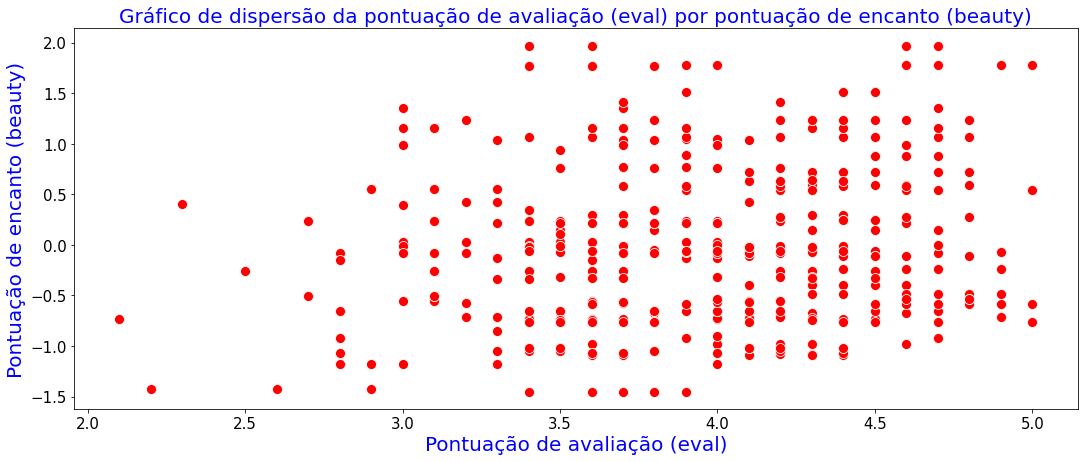

In [23]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "eval", y = "beauty", data = df, s = 100, color = "red")
plt.title("Gráfico de dispersão da pontuação de avaliação (eval) por pontuação de encanto (beauty)", color = "blue", size = 20)
plt.xlabel("Pontuação de avaliação (eval)", color = "blue", size = 20)
plt.ylabel("Pontuação de encanto (beauty)", color = "blue", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [24]:
# Calculamos a correlação entre esses parâmetros

df[["beauty", "eval"]].corr()

,beauty,eval
beauty,1.000000,0.189039
eval,0.189039,1.000000


**Teste**

In [25]:
p_stats, pvalue = pearsonr(df["beauty"], df["eval"])
print(f"Correlation = {p_stats}, P-Value = {pvalue}")

Correlation = 0.1890390908404521, P-Value = 4.247115419812614e-05


**Resultado do teste**

In [26]:
if pvalue > 0.05:
    print("Aceitar hipótese nula")
else:
    print("Aceitar Hipótese Alternativa")

Aceitar Hipótese Alternativa


**Execute um t-test de duas amostras para amostras independentes**

In [27]:
Sample1 = [9, 11, 10, 11, 10, 12, 9, 11, 12, 9, 10]
Sample2 = [10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13]

In [28]:
ttest_ind(Sample1, Sample2)

Ttest_indResult(statistic=-2.2164816032790386, pvalue=0.03841461541539729)

<font color="pink">**Mean μ = 63.18 inches and Standard Deviation σ= 13.27 inches. What is the Z-score when x = 91.54 inches?**</font>

Nas estatísticas, um escore-z (ou escore padrão) de uma observação é o número de desvios padrão acima ou abaixo da média da população.

Para calcular um escore z, é necessário saber a média da população e o desvio padrão da população. Em casos onde é impossível medir cada observação de uma população, é possível estimar o desvio padrão usando uma amostra aleatória.

* Para mais detalhes [fazer click aqui](https://www.statisticshowto.com/probability-and-statistics/z-score/).

In [29]:
z_score = (91.54 - 63.16) / 13.27
z_score

2.138658628485306

<font color="pink">**Average Wage = 5.85, Standard Deviation = 0.35, The probability that a selected worker earns more than 6.9**</font>

In [30]:
prob = scipy.stats.norm.cdf((6.90 - 5.85) / 0.35)
print(1- prob)

0.0013498980316301035


<font color="pink">**Mean = 490, Variance = 400, Probability that a randomly selected pill contains at least 500 mg of minerals**</font>

In [31]:
prob2 = scipy.stats.norm.cdf((500 - 490) / 20)
print(1 - prob2)

0.3085375387259869


# <font color="orange">BOSTON DataSet</font>

In [32]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [33]:
boston_df = boston_df.drop(columns = ["Unnamed: 0"])
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


**Boxplot: valor médio de casas ocupadas pelo proprietário**

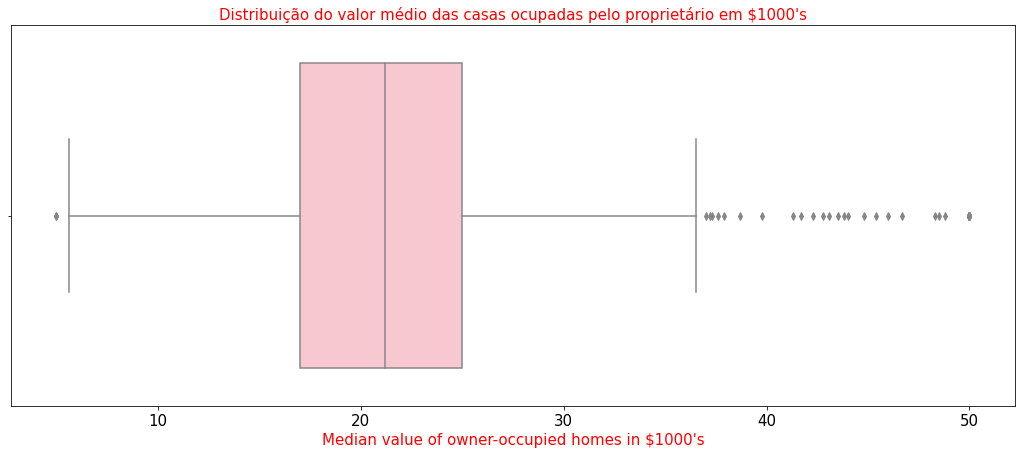

In [37]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = boston_df["MEDV"], color = "pink")
plt.title("Distribuição do valor médio das casas ocupadas pelo proprietário em $1000's", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Valor médio das casas ocupadas pelo proprietário em $1000's", color = "red", size = 15)
plt.show()

**Casas em Charles River**

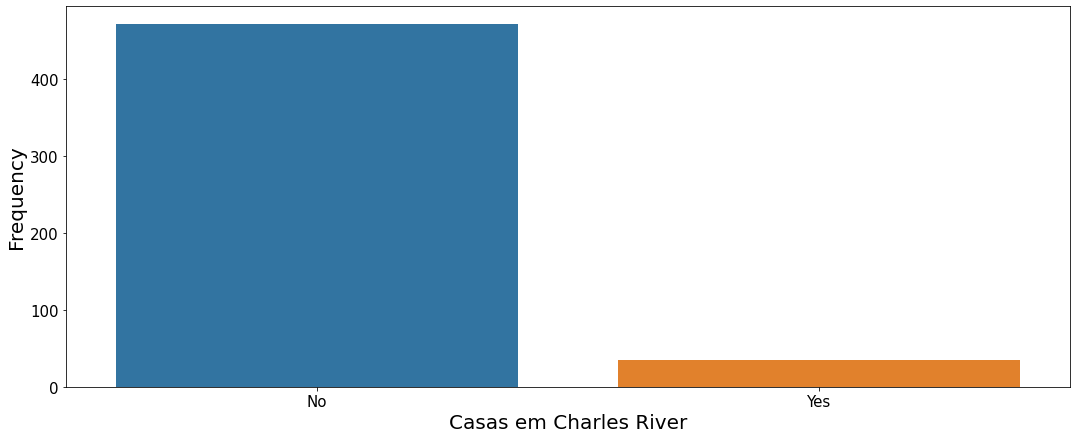

In [38]:
plt.figure(figsize = (18, 7))
sns.countplot(x = boston_df["CHAS"])
plt.xlabel("Casas em Charles River", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks([0.0, 1.0], labels = ["No", "Yes"], size = 15)
plt.yticks(size = 15)
plt.show()

**Valor medio por Idade da casa**

In [39]:
def age(x):
    if x <= 35:
        return "new"
    elif x > 35 and x <= 70:
        return "moderada"
    else:
        return "velha"
    
boston_df["age_group"] = boston_df["AGE"].apply(age)

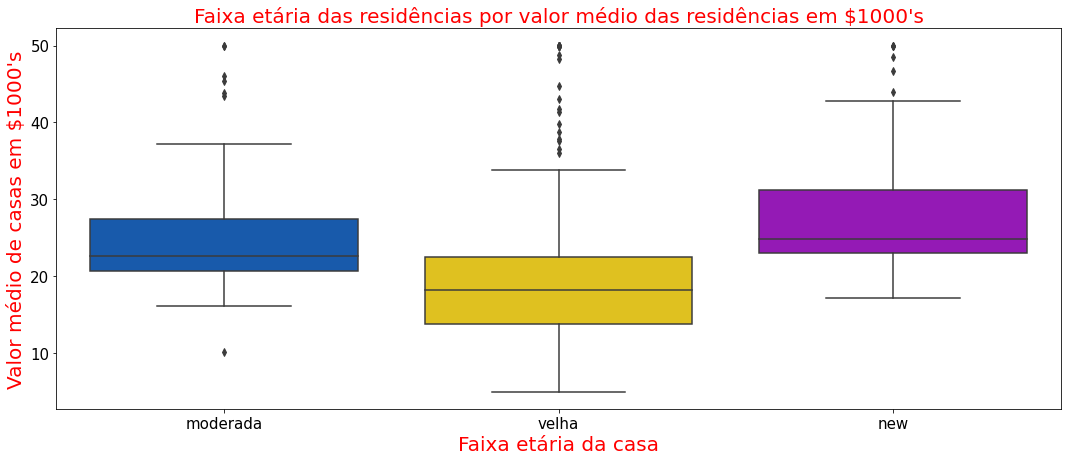

In [40]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = boston_df["age_group"], y = boston_df["MEDV"], palette = "prism")
plt.title("Faixa etária das residências por valor médio das residências em $1000's", size = 20, color = "red")
plt.xlabel("Faixa etária da casa", size = 20, color = "red")
plt.ylabel("Valor médio de casas em $1000's", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Gráfico de dispersão entre as concentrações de óxido nítrico (NOX) e a proporção de Acres comerciales no minoristas por cidade**

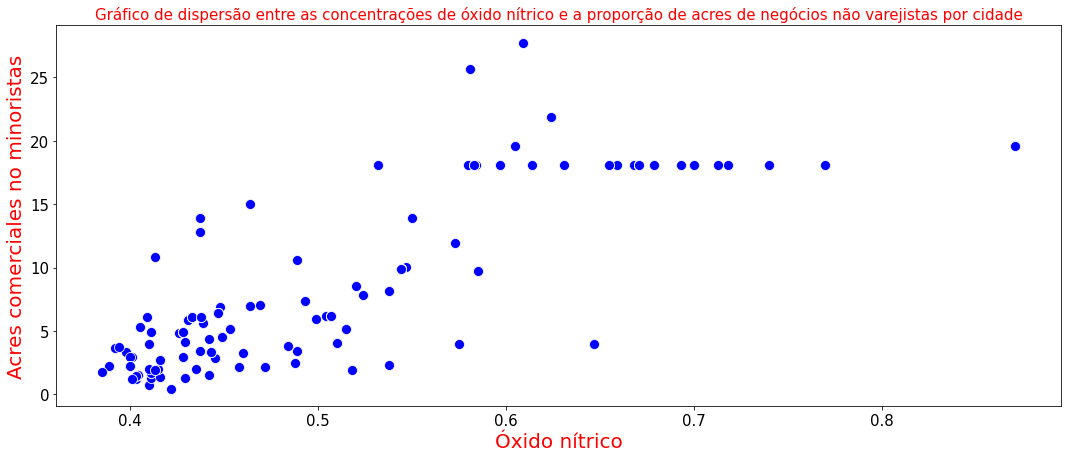

In [42]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df, s = 100, color = "blue")
plt.title("Gráfico de dispersão entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas por cidade", color = "red", size = 15)
plt.xlabel("Óxido nítrico", size = 20, color = "red")
plt.ylabel("Acres comerciales no minoristas", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Histograma para a variável de proporção aluno/professor**

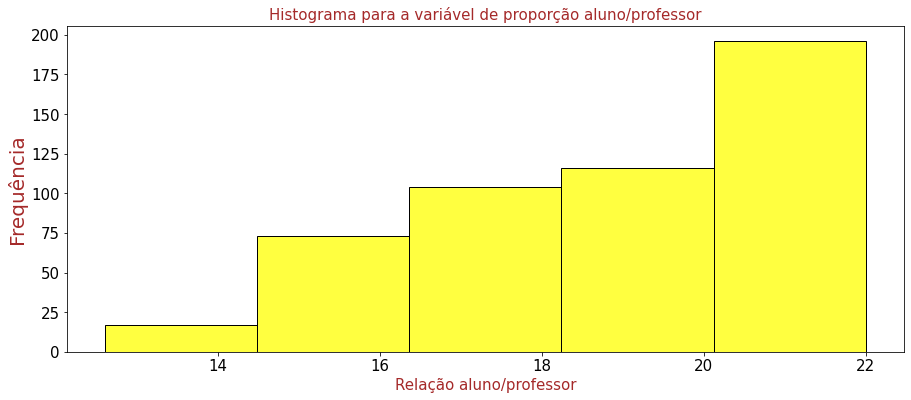

In [44]:
plt.figure(figsize = (15, 6))
sns.histplot(x = boston_df["PTRATIO"], color = "yellow", bins = 5)
plt.title("Histograma para a variável de proporção aluno/professor", color = "brown", size = 15)
plt.xlabel("Relação aluno/professor", size = 15, color = "brown")
plt.ylabel("Frequência", size = 20, color = "brown")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Existe uma diferença significativa no valor médio das casas delimitadas pelo rio Charles ou não? (**T-Test** para amostras independentes)

## <font color="orange">T-Test</font>

Hipótese Nula: Preço da casa independente de Charles River

Hipótese alternativa: Preço da casa dependente de Charles River

In [45]:
hcr = boston_df[boston_df["CHAS"] == 1]["MEDV"]
hncr = boston_df[boston_df["CHAS"] == 0]["MEDV"]

**Test**

In [46]:
t_stats, p_value = ttest_ind(hcr, hncr)
print(f"T-Statistics = {t_stats}, P-Value = {p_value}")

T-Statistics = 3.996437466090509, P-Value = 7.390623170519905e-05


**Resultado dos testes**

In [47]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


Há uma diferença nos valores da mediana (**Median**) das casas (MEDV) para cada proporção de unidades ocupadas pelo proprietário construídas antes de $1940$ (AGE)? (<font color="yellow">ANOVA</font>)

## <font color="orange">ANOVA</font>

Hipótese Nula: O preço da casa não é diferente por idade

Hipótese alternativa: O preço da casa é diferente por **AGE**

In [50]:
new_house = boston_df[boston_df["age_group"] == "new"]["MEDV"]
moderate_house = boston_df[boston_df["age_group"] == "moderate"]["MEDV"]
old_house = boston_df[boston_df["age_group"] == "old"]["MEDV"]

**Teste**

In [51]:
f_stats, p_value = f_oneway(new_house, moderate_house, old_house)
print(f"F-Statistics = {f_stats}, P-Value = {p_value}")

F-Statistics = nan, P-Value = nan


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


**Resultado dos testes**

In [52]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


Podemos concluir que não há relação entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas por cidade? (<font color="pink">Correlação de Pearson</font>)


## <font color="orange">Pearson Correlation</font>

Hipótese Nula: NÃO há relação entre as concentrações de óxido nítrico e a proporção de acres comerciais não varejistas por cidade

Hipótese alternativa: Há uma relação entre as concentrações de óxido nítrico e a proporção de acres comerciais não varejistas por cidade

In [55]:
pc_stats, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson Correlation = {pc_stats}, P-Value = {p_value}")

Pearson Correlation = 0.7636514469209154, P-Value = 7.913361061236894e-98


**Resultado dos testes**

In [56]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis
